# Image Classification of 10 features using CNN. The dataset is complex consisting of a variety of images

In [1]:
# Libraries Import
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the dataset

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 16s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
# converting 2-D matrix to 1-D matrix

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [9]:
# Index to class mapping

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

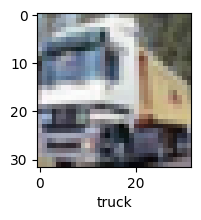

In [11]:
# Function to plot the image

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    
plot_sample(X_train, y_train, 1)

In [12]:
# Normalizing the training and testing images

X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
# Building direct ANN for 2 hidden layers with 3000, 1000 neurons respectively and endlayer consisting of 10 neurons

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.8105 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 107s 69ms/step - loss: 1.6240 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.5448 - accuracy: 0.4556
Epoch 4/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.4849 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.4347 - accuracy: 0.4954


In [14]:
# method is time consuming + accuracy is low

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 18ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.37      0.48      1000
           1       0.64      0.55      0.59      1000
           2       0.45      0.16      0.24      1000
           3       0.28      0.46      0.35      1000
           4       0.64      0.13      0.22      1000
           5       0.31      0.44      0.36      1000
           6       0.59      0.38      0.46      1000
           7       0.38      0.71      0.50      1000
           8       0.66      0.53      0.59      1000
           9       0.42      0.70      0.52      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.43     10000
weighted avg       0.51      0.44      0.43     10000



In [15]:
# Using CNN

cnn = models.Sequential([
    # Convolution + pooling layer - 2 Layers
    # filters - 32, size - 3 x 3, activation function - relu, pooling method - max pooling with size = 2 x 2
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Dense Deep Learning Layer - Neuron size is reduced
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
# Optimizer is changed to adam

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 36s 22ms/step - loss: 1.4923 - accuracy: 0.4679
Epoch 2/5
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1294 - accuracy: 0.6029
Epoch 3/5
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9963 - accuracy: 0.6535
Epoch 4/5
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9124 - accuracy: 0.6847
Epoch 5/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8451 - accuracy: 0.7068


In [18]:
# Takes comparatively less time + gives better accuracy

cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9611 - accuracy: 0.6667


[0.9610886573791504, 0.666700005531311]